In [243]:
import re    # for regular expressions 
import nltk  # for text manipulation 
import string 
import warnings 
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt  

pd.set_option("display.max_colwidth", 200) 
warnings.filterwarnings("ignore", category=DeprecationWarning) 

%matplotlib inline

In [244]:
import re    # for regular expressions 
import nltk  # for text manipulation 
import string 
import warnings 
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt  

pd.set_option("display.max_colwidth", 200) 
warnings.filterwarnings("ignore", category=DeprecationWarning) 

%matplotlib inline

In [245]:
train  = pd.read_csv('Downloads/train_E6oV3lV.csv') 
test = pd.read_csv('Downloads/test_tweets_anuFYb8.csv')

In [246]:
#Text is a highly unstructured form of data, various types of noise are present in it and the data is not readily analyzable without any pre-processing. The entire process of cleaning and standardization of text, making it noise-free and ready for analysis is known as text preprocessing. We will divide it into 2 parts:

#Data Inspection
#Data Cleaning
#Data Inspection
#Let’s check out a few non racist/sexist tweets.


train[train['label'] == 0].head(10)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo
6,7,0,@user camping tomorrow @user @user @user @user @user @user @user dannyâ¦
7,8,0,the next school year is the year for exams.ð¯ can't think about that ð­ #school #exams #hate #imagine #actorslife #revolutionschool #girl
8,9,0,we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers â¦
9,10,0,@user @user welcome here ! i'm it's so #gr8 !


In [247]:
# Now check out a few racist/sexist tweets.

train[train['label'] == 1].head(10)

,id,label,tweet
13,14,1,@user #cnn calls #michigan middle school 'build the wall' chant '' #tcot
14,15,1,no comment! in #australia #opkillingbay #seashepherd #helpcovedolphins #thecove #helpcovedolphins
17,18,1,retweet if you agree!
23,24,1,@user @user lumpy says i am a . prove it lumpy.
34,35,1,it's unbelievable that in the 21st century we'd need something like this. again. #neverump #xenophobia
56,57,1,@user lets fight against #love #peace
68,69,1,ð©the white establishment can't have blk folx running around loving themselves and promoting our greatness
77,78,1,"@user hey, white people: you can call people 'white' by @user #race #identity #medâ¦"
82,83,1,how the #altright uses &amp; insecurity to lure men into #whitesupremacy
111,112,1,@user i'm not interested in a #linguistics that doesn't address #race &amp; . racism is about #power. #raciolinguistics bringsâ¦


In [248]:
# There are quite a many words and characters which are not really required. So, we will try to keep only those words which are important and add value.

#Let’s check dimensions of the train and test dataset.

train.shape, test.shape

((31962, 3), (17197, 2))

In [249]:
# Train set has 31,962 tweets and test set has 17,197 tweets.

# Let’s have a glimpse at label-distribution in the train dataset.

train["label"].value_counts()

0    29720
1     2242
Name: label, dtype: int64

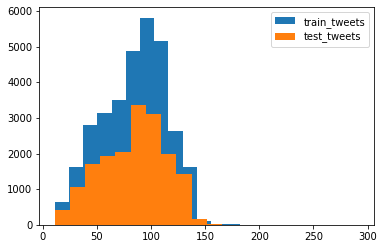

In [250]:
# In the train dataset, we have 2,242 (~7%) tweets labeled as racist or sexist, and 29,720 (~93%) tweets labeled as non racist/sexist. So, it is an imbalanced classification challenge.

# Now we will check the distribution of length of the tweets, in terms of words, in both train and test data.

length_train = train['tweet'].str.len() 
length_test = test['tweet'].str.len() 
plt.hist(length_train, bins=20, label="train_tweets") 
plt.hist(length_test, bins=20, label="test_tweets") 
plt.legend() 
plt.show()

In [251]:
# Before we begin cleaning, let’s first combine train and test datasets. Combining the datasets will make it convenient for us to preprocess the data. Later we will split it back into train and test data.

combi = train.append(test, ignore_index=True) 
combi.shape

(49159, 3)

In [252]:
combi = train.append(test, ignore_index=True, sort=False) 
combi.shape

(49159, 3)

In [253]:
# Given below is a user-defined function to remove unwanted text patterns from the tweets.

def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
    return input_txt

In [254]:
# We will be following the steps below to clean the raw tweets in out data.

# We will remove the twitter handles as they are already masked as @user due to privacy concerns. These twitter handles hardly give any information about the nature of the tweet.

# We will also get rid of the punctuations, numbers and even special characters since they wouldn’t help in differentiating different types of tweets.

# Most of the smaller words do not add much value. For example, ‘pdx’, ‘his’, ‘all’. So, we will try to remove them as well from our data.

# Lastly, we will normalize the text data. For example, reducing terms like loves, loving, and lovable to their base word, i.e., ‘love’.are often used in the same context. If we can reduce them to their root word, which is ‘love’. It will help in reducing the total number of unique words in our data without losing a significant amount of information.

# 1. Removing Twitter Handles (@user)

# Let’s create a new column tidy_tweet, it will contain the cleaned and processed tweets. Note that we have passed “@[]*” as the pattern to the remove_pattern function. It is actually a regular expression which will pick any word starting with ‘@’.

combi['tidy_tweet'] = np.vectorize(remove_pattern)(combi['tweet'], "@[\w]*") 
combi.head()

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0.0,factsguide: society now #motivation,factsguide: society now #motivation


In [255]:
# 2. Removing Punctuations, Numbers, and Special Characters

# Here we will replace everything except characters and hashtags with spaces. The regular expression “[^a-zA-Z#]” means anything except alphabets and ‘#’.

combi['tidy_tweet'] = combi['tidy_tweet'].str.replace("[^a-zA-Z#]", " ") 
combi.head(10)

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when a father is dysfunctional and is so selfish he drags his kids into his dysfunction #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks for #lyft credit i can t use cause they don t offer wheelchair vans in pdx #disapointed #getthanked
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model i love u take with u all the time in ur
4,5,0.0,factsguide: society now #motivation,factsguide society now #motivation
5,6,0.0,[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo,huge fan fare and big talking before they leave chaos and pay disputes when they get there #allshowandnogo
6,7,0.0,@user camping tomorrow @user @user @user @user @user @user @user dannyâ¦,camping tomorrow danny
7,8,0.0,the next school year is the year for exams.ð¯ can't think about that ð­ #school #exams #hate #imagine #actorslife #revolutionschool #girl,the next school year is the year for exams can t think about that #school #exams #hate #imagine #actorslife #revolutionschool #girl
8,9,0.0,we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers â¦,we won love the land #allin #cavs #champions #cleveland #clevelandcavaliers
9,10,0.0,@user @user welcome here ! i'm it's so #gr8 !,welcome here i m it s so #gr


In [256]:
# 3. Removing Short Words

# We have to be a little careful here in selecting the length of the words which we want to remove. So, I have decided to remove all the words having length 3 or less. For example, terms like “hmm”, “oh” are of very little use. It is better to get rid of them.

combi['tidy_tweet'] = combi['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

In [257]:
# Let’s take another look at the first few rows of the combined dataframe.

combi.head()

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when father dysfunctional selfish drags kids into dysfunction #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks #lyft credit cause they offer wheelchair vans #disapointed #getthanked
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguide society #motivation


In [258]:
# You can see the difference between the raw tweets and the cleaned tweets (tidy_tweet) quite clearly. Only the important words in the tweets have been retained and the noise (numbers, punctuations, and special characters) has been removed.

# 4. Text Normalization

# Here we will use nltk’s PorterStemmer() function to normalize the tweets. But before that we will have to tokenize the tweets. Tokens are individual terms or words, and tokenization is the process of splitting a string of text into tokens.

tokenized_tweet = combi['tidy_tweet'].apply(lambda x: x.split()) # tokenizing 
tokenized_tweet.head()


0                [when, father, dysfunctional, selfish, drags, kids, into, dysfunction, #run]
1    [thanks, #lyft, credit, cause, they, offer, wheelchair, vans, #disapointed, #getthanked]
2                                                                     [bihday, your, majesty]
3                                                            [#model, love, take, with, time]
4                                                          [factsguide, society, #motivation]
Name: tidy_tweet, dtype: object

In [259]:
# Now we can normalize the tokenized tweets.

from nltk.stem.porter import * 
stemmer = PorterStemmer() 
tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming

In [260]:
# Now let’s stitch these tokens back together. It can easily be done using nltk’s MosesDetokenizer function.

for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])    
combi['tidy_tweet'] = tokenized_tweet

In [261]:
# A) Understanding the common words used in the tweets: WordCloud

# Now I want to see how well the given sentiments are distributed across the train dataset. One way to accomplish this task is by understanding the common words by plotting wordclouds.

# A wordcloud is a visualization wherein the most frequent words appear in large size and the less frequent words appear in smaller sizes.

# Let’s visualize all the words our data using the wordcloud plot.

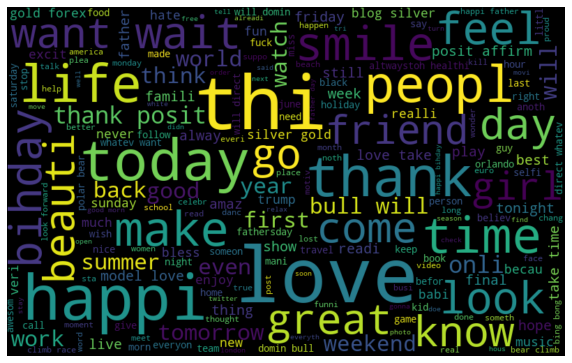

In [262]:
all_words = ' '.join([text for text in combi['tidy_tweet']]) 
from wordcloud import WordCloud 
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words) 
plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off') 
plt.show()

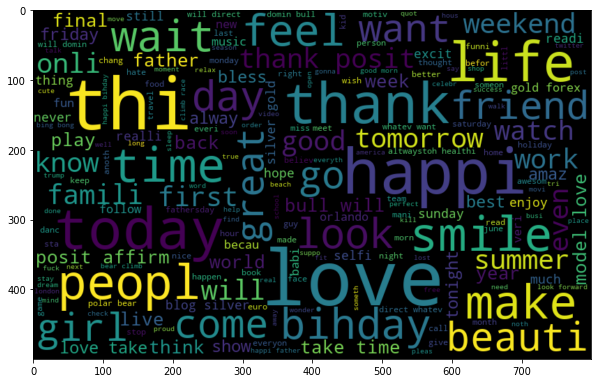

In [263]:
# B) Words in non racist/sexist tweets
normal_words =' '.join([text for text in combi['tidy_tweet'][combi['label'] == 0]])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")

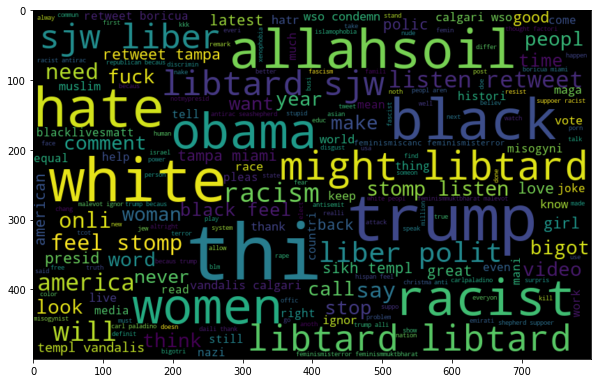

In [264]:
# C) Racist/Sexist Tweets
negative_words = ' '.join([text for text in combi['tidy_tweet'][combi['label'] == 1]])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")

In [265]:
# As we can clearly see, most of the words have negative connotations. 
# So, it seems we have a pretty good text data to work on. Next we will the hashtags/trends in our twitter data.

In [266]:
# D) Understanding the impact of Hashtags on tweets sentiment

# Hashtags in twitter are synonymous with the ongoing trends on twitter at any particular point in time. We should try to check whether these hashtags add any value to our sentiment analysis task, i.e., they help in distinguishing tweets into the different sentiments.

#We will store all the trend terms in two separate lists — one for non-racist/sexist tweets and the other for racist/sexist tweets.

# function to collect hashtags 
def hashtag_extract(x):    
    hashtags = []    
    # Loop over the words in the tweet    
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)
    return hashtags
# extracting hashtags from non racist/sexist tweets 
HT_regular = hashtag_extract(combi['tidy_tweet'][combi['label'] == 0]) 
# extracting hashtags from racist/sexist tweets 
HT_negative = hashtag_extract(combi['tidy_tweet'][combi['label'] == 1]) 
# unnesting list 
HT_regular = sum(HT_regular,[]) 
HT_negative = sum(HT_negative,[])

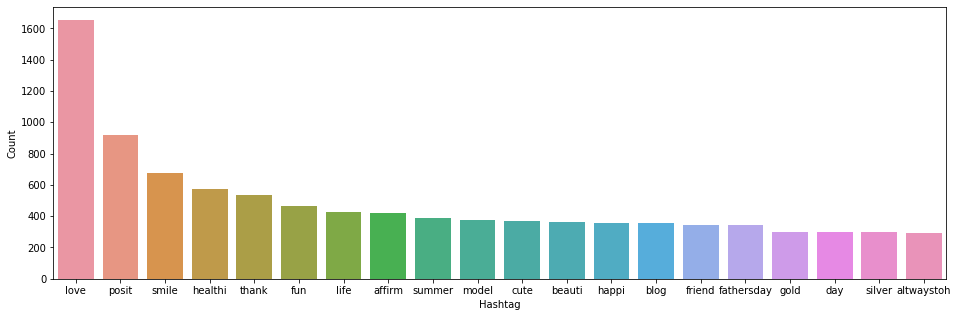

In [267]:
# Now that we have prepared our lists of hashtags for both the sentiments, we can plot the top ‘n’ hashtags. So, first let’s check the hashtags in the non-racist/sexist tweets.

# Non-Racist/Sexist Tweets

a = nltk.FreqDist(HT_regular) 
d = pd.DataFrame({'Hashtag': list(a.keys()),'Count': list(a.values())})

# selecting top 20 most frequent hashtags     
d = d.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(16,5)) 
ax = sns.barplot(data=d, x= "Hashtag", y = "Count") 
ax.set(ylabel = 'Count') 
plt.show()

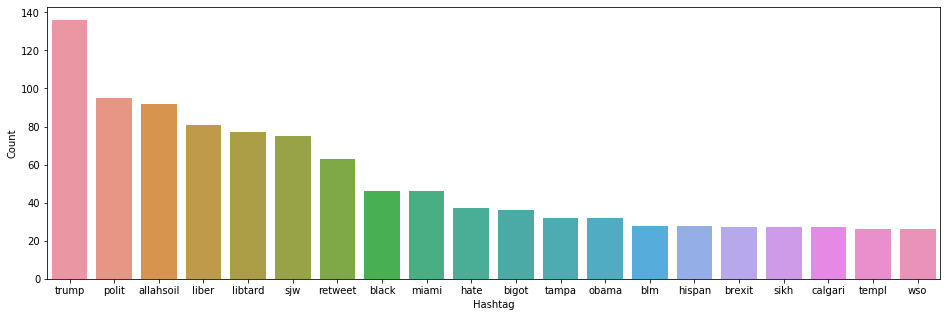

In [268]:
# All these hashtags are positive and it makes sense. I am expecting negative terms in the plot of the second list. Let’s check the most frequent hashtags appearing in the racist/sexist tweets.

# Racist/Sexist Tweets

b = nltk.FreqDist(HT_negative) 
e = pd.DataFrame({'Hashtag': list(b.keys()), 'Count': list(b.values())}) 

# selecting top 20 most frequent hashtags 
e = e.nlargest(columns="Count", n = 20)   
plt.figure(figsize=(16,5)) 
ax = sns.barplot(data=e, x= "Hashtag", y = "Count")

In [269]:
# As expected, most of the terms are negative with a few neutral terms as well. So, it’s not a bad idea to keep these hashtags in our data as they contain useful information. 
# Next, we will try to extract features from the tokenized tweets.

In [270]:
# To analyse a preprocessed data, it needs to be converted into features. 
# Depending upon the usage, text features can be constructed using assorted techniques – Bag of Words, TF-IDF, and Word Embeddings. Read on to understand these techniques in detail.

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer 
import gensim

In [271]:
# Let’s start with the Bag-of-Words Features.

# Consider a Corpus C of D documents {d1,d2…..dD} and N unique tokens extracted out of the corpus C. The N tokens (words) will form a dictionary and the size of the bag-of-words matrix M will be given by D X N. Each row in the matrix M contains the frequency of tokens in document D(i).

# Let us understand this using a simple example.

# D1: He is a lazy boy. She is also lazy.

# D2: Smith is a lazy person.

# The dictionary created would be a list of unique tokens in the corpus =[‘He’,’She’,’lazy’,’boy’,’Smith’,’person’]

# Here, D=2, N=6


In [272]:
# Now the columns in the above matrix can be used as features to build a classification model.

bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english') 
bow = bow_vectorizer.fit_transform(combi['tidy_tweet']) 
bow.shape

(49159, 1000)

In [273]:
# This is another method which is based on the frequency method but it is different to the bag-of-words approach in the sense that it takes into account not just the occurrence of a word in a single document (or tweet) but in the entire corpus.

# TF-IDF works by penalising the common words by assigning them lower weights while giving importance to words which are rare in the entire corpus but appear in good numbers in few documents.

# Let’s have a look at the important terms related to TF-IDF:

# TF = (Number of times term t appears in a document)/(Number of terms in the document)

# IDF = log(N/n), where, N is the number of documents and n is the number of documents a term t has appeared in.

# TF-IDF = TF*IDF

tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english') 
tfidf = tfidf_vectorizer.fit_transform(combi['tidy_tweet']) 
tfidf.shape

(49159, 1000)

In [274]:
# 1. Word2Vec Embeddings

# Word2Vec is not a single algorithm but a combination of two techniques – CBOW (Continuous bag of words) and Skip-gram model. 
# Both of these are shallow neural networks which map word(s) to the target variable which is also a word(s). 
# Both of these techniques learn weights which act as word vector representations.

# CBOW tends to predict the probability of a word given a context. 
# A context may be a single adjacent word or a group of surrounding words. 
# The Skip-gram model works in the reverse manner, it tries to predict the context for a given word.

# There are three laters: - an input layer, - a hidden layer, and - an output layer.

# The input layer and the output, both are one- hot encoded of size [1 X V], where V is the size of the vocabulary (no. of unique words in the corpus). 
# The output layer is a softmax layer which is used to sum the probabilities obtained in the output layer to 1. 
# The weights learned by the model are then used as the word-vectors.

# We will go ahead with the Skip-gram model as it has the following advantages:

# It can capture two semantics for a single word. i.e it will have two vector representations of ‘apple’. 
#One for the company Apple and the other for the fruit.

# Skip-gram with negative sub-sampling outperforms CBOW generally.

# We will train a Word2Vec model on our data to obtain vector representations for all the unique words present in our corpus


In [275]:
# Let’s train a Word2Vec model on our corpus.

tokenized_tweet = combi['tidy_tweet'].apply(lambda x: x.split()) # tokenizing 

In [276]:
model_w2v = gensim.models.Word2Vec(
    tokenized_tweet,
    size=200, # desired no. of features/independent variables
    window=5, # context window size
    min_count=2,
    sg = 1, # 1 for skip-gram model
    hs = 0,
    negative = 10, # for negative sampling
    workers= 2, # no.of cores
    seed = 34)

In [277]:
model_w2v.train(tokenized_tweet, total_examples= len(combi['tidy_tweet']), epochs=20)

(6510028, 7536020)

In [278]:
# Let’s play a bit with our Word2Vec model and see how does it perform. 
# We will specify a word and the model will pull out the most similar words from the corpus.

model_w2v.wv.most_similar(positive="dinner")

[('spaghetti', 0.5523214340209961),
 ('fav', 0.5471742153167725),
 ('#avocado', 0.5456522703170776),
 ('#biall', 0.542512059211731),
 ('#cellar', 0.5402878522872925),
 ('cookout', 0.5385845899581909),
 ('#bihdaydinn', 0.5340997576713562),
 ('noodl', 0.5320669412612915),
 ('melani', 0.531813383102417),
 ('gown', 0.529962956905365)]

In [279]:
model_w2v.wv.most_similar(positive="trump")

[('donald', 0.5446376204490662),
 ('phoni', 0.5385525226593018),
 ('melo', 0.5284422636032104),
 ('hillari', 0.527400016784668),
 ('#delegaterevolt', 0.525578498840332),
 ('tomlin', 0.5148929357528687),
 ('unstabl', 0.5140909552574158),
 ('unfit', 0.5115920901298523),
 ('unfavor', 0.5111328363418579),
 ('jibe', 0.5097809433937073)]

In [280]:
# From the above two examples, we can see that our word2vec model does a good job of finding the most similar words for a given word. 
# But how is it able to do so? That’s because it has learned vectors for every unique word in our data and it uses cosine similarity to find out the most similar vectors (words).

# Let’s check the vector representation of any word from our corpus.

model_w2v['food']

array([ 0.2579862 , -0.2495749 , -0.00757297, -0.25200263, -0.29439127,
        0.02704044,  0.7361505 , -0.29256195,  0.5081289 ,  0.1546487 ,
        0.55601746,  0.4725606 , -0.10833861, -0.28180197,  0.15164055,
        0.40117818, -0.22799797, -0.10559467,  1.0538751 , -0.2948305 ,
       -0.07188804, -0.02417445, -0.24351022,  0.11686985, -0.41264573,
        0.4740816 ,  0.25706348, -0.49992314, -0.21298029, -0.1564358 ,
        0.62735105,  0.476581  ,  0.04182637, -0.05834033,  0.44833052,
        0.6683372 ,  0.55122185, -0.40171474, -0.63447994,  0.01276261,
       -0.6936839 ,  0.1886383 ,  0.5629712 , -0.25450596,  0.543538  ,
        0.94755924, -0.22135806, -0.09547774, -0.369955  , -0.30006745,
        0.8428461 ,  0.58510584, -0.558612  ,  0.49483174, -0.12068237,
        0.91113776, -0.4119515 ,  0.29445907,  0.17820722,  0.01763748,
       -0.10658906, -0.7887775 ,  0.20620918,  0.27952236,  0.04922152,
       -0.87288284, -0.02322053, -0.02095481,  0.2662627 , -0.01

In [281]:
len(model_w2v['food']) #The length of the vector is 200

200

In [282]:
# Preparing Vectors for Tweets

# Since our data contains tweets and not just words, we’ll have to figure out a way to use the word vectors from word2vec model to create vector representation for an entire tweet. 
# There is a simple solution to this problem, we can simply take mean of all the word vectors present in the tweet. 
# The length of the resultant vector will be the same, i.e. 200. 
# We will repeat the same process for all the tweets in our data and obtain their vectors. 
# Now we have 200 word2vec features for our data.

# We will use the below function to create a vector for each tweet by taking the average of the vectors of the words present in the tweet.

def word_vector(tokens, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0.
    for word in tokens:
        try:
            vec += model_w2v[word].reshape((1, size))
            count += 1.
        except KeyError: # handling the case where the token is not in vocabulary continue
            if count != 0: vec /= count
    return vec

In [283]:
# Preparing word2vec feature set…

wordvec_arrays = np.zeros((len(tokenized_tweet), 200)) 
for i in range(len(tokenized_tweet)):
    wordvec_arrays[i,:] = word_vector(tokenized_tweet[i], 200)
    wordvec_df = pd.DataFrame(wordvec_arrays) 
    wordvec_df.shape

In [284]:
# 2. Doc2Vec Embedding

# Doc2Vec model is an unsupervised algorithm to generate vectors for sentence/paragraphs/documents. 
# This approach is an extension of the word2vec. 
# The major difference between the two is that doc2vec provides an additional context which is unique for every document in the corpus. 
# This additional context is nothing but another feature vector for the whole document. 
# This document vector is trained along with the word vectors.

# Let’s load the required libraries.

from tqdm import tqdm 
tqdm.pandas(desc="progress-bar") 
from gensim.models.doc2vec import LabeledSentence

In [285]:
# To implement doc2vec, we have to labelise or tag each tokenised tweet with unique IDs. 
# We can do so by using Gensim’s LabeledSentence() function.

def add_label(twt):
    output = []
    for i, s in zip(twt.index, twt): output.append(LabeledSentence(s, ["tweet_" + str(i)]))
    return output

In [286]:
labeled_tweets = add_label(tokenized_tweet) # label all the tweets

In [287]:
# Let’s have a look at the result.

labeled_tweets[:6]

[LabeledSentence(words=['when', 'father', 'dysfunct', 'selfish', 'drag', 'kid', 'into', 'dysfunct', '#run'], tags=['tweet_0']),
 LabeledSentence(words=['thank', '#lyft', 'credit', 'caus', 'they', 'offer', 'wheelchair', 'van', '#disapoint', '#getthank'], tags=['tweet_1']),
 LabeledSentence(words=['bihday', 'your', 'majesti'], tags=['tweet_2']),
 LabeledSentence(words=['#model', 'love', 'take', 'with', 'time'], tags=['tweet_3']),
 LabeledSentence(words=['factsguid', 'societi', '#motiv'], tags=['tweet_4']),
 LabeledSentence(words=['huge', 'fare', 'talk', 'befor', 'they', 'leav', 'chao', 'disput', 'when', 'they', 'there', '#allshowandnogo'], tags=['tweet_5'])]

In [288]:
# Now let’s train a doc2vec model.

model_d2v = gensim.models.Doc2Vec(dm=1, # dm = 1 for ‘distributed memory’ model                                   
                                  dm_mean=1, # dm = 1 for using mean of the context word vectors                                  
                                  vector_size=200, # no. of desired features                                  
                                  window=5, # width of the context window                                  
                                  negative=7, # if > 0 then negative sampling will be used                                 
                                  min_count=5, # Ignores all words with total frequency lower than 2.
                                  workers=3, # no. of cores                                  
                                  alpha=0.1, # learning rate                                  
                                  seed = 23) 
model_d2v.build_vocab([i for i in tqdm(labeled_tweets)])

model_d2v.train(labeled_tweets, total_examples= len(combi['tidy_tweet']), epochs=15)

100%|██████████| 49159/49159 [00:00<00:00, 2282959.72it/s]


In [289]:
# Preparing doc2vec Feature Set

docvec_arrays = np.zeros((len(tokenized_tweet), 200)) 
for i in range(len(combi)): docvec_arrays[i,:] = model_d2v.docvecs[i].reshape((1,200))    

docvec_df = pd.DataFrame(docvec_arrays) 
docvec_df.shape

(49159, 200)

In [290]:
# We are now done with all the pre-modeling stages required to get the data in the proper form and shape. 
# We will be building models on the datasets with different feature sets prepared in the earlier sections — Bag-of-Words, TF-IDF, word2vec vectors, and doc2vec vectors. 
# We will use the following algorithms to build models:

# Logistic Regression
# Support Vector Machine
# RandomForest
# XGBoost
# Evaluation Metric

# F1 score is being used as the evaluation metric. 
# It is the weighted average of Precision and Recall. 
# Therefore, this score takes both false positives and false negatives into account. 
# It is suitable for uneven class distribution problems.

# The important components of F1 score are:

# True Positives (TP) - These are the correctly predicted positive values which means that the value of actual class is yes and the value of predicted class is also yes.
# True Negatives (TN) - These are the correctly predicted negative values which means that the value of actual class is no and value of predicted class is also no.
# False Positives (FP) – When actual class is no and predicted class is yes.
# False Negatives (FN) – When actual class is yes but predicted class in no.
# Precision = TP/TP+FP

# Recall = TP/TP+FN

# F1 Score = 2(Recall Precision) / (Recall + Precision)

In [291]:
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import f1_score

In [331]:
# Bag-of-Words Features

# We will first try to fit the logistic regression model on the Bag-of_Words (BoW) features.
train_bow = bow[0:31962] 
test_bow = bow[31962:,:] 

In [344]:
# splitting data into training and validation
xtrain_bow = train_test_split(train_bow, train['label'],
                              random_state=42,
                              test_size=0.33)

In [334]:
xvalid_bow = train_test_split(train_bow, train['label'],
                              random_state=42,
                              test_size=0.33)

In [335]:
ytrain = train_test_split(train_bow, train['label'],
                              random_state=42,
                              test_size=0.33)

In [336]:
yvalid = train_test_split(train_bow, train['label'],
                              random_state=42,
                              test_size=0.33)

In [337]:
lreg = LogisticRegression(solver='lbfgs', multi_class='auto')

In [338]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [339]:
# check scikit-learn version
import sklearn
print('sklearn: %s' % sklearn.__version__)

sklearn: 0.21.3


In [345]:
# run block of code and catch warnings
lreg.fit(xtrain_bow, ytrain) 

ValueError: setting an array element with a sequence.

In [346]:
prediction = lreg.predict_proba(xvalid_bow) # predicting on the validation set 
prediction_int = prediction[:,1] >= 0.33 # if prediction is greater than or equal to 0.3 than 1 else 0 
prediction_int = prediction_int.astype(np.int) 
f1_score(yvalid, prediction_int) # calculating f1 score for the validation set

NotFittedError: Call fit before prediction

In [347]:
test_pred = lreg.predict_proba(test_bow) 
test_pred_int = test_pred[:,1] >= 0.33 
test_pred_int = test_pred_int.astype(np.int) 
test['label'] = test_pred_int 
submission = test[['id','label']] 
submission.to_csv('sub_lreg_bow.csv', index=False) # writing data to a CSV file

NotFittedError: Call fit before prediction

In [348]:
train_tfidf = tfidf[:31962,:] 
test_tfidf = tfidf[31962:,:] 

In [349]:
xtrain_tfidf = train_tfidf[ytrain.index] 
xvalid_tfidf = train_tfidf[yvalid.index]
lreg.fit(xtrain_tfidf, ytrain) 
prediction = lreg.predict_proba(xvalid_tfidf) 
prediction_int = prediction[:,1] >= 0.33 
prediction_int = prediction_int.astype(np.int) 
f1_score(yvalid, prediction_int) # calculating f1 score for the validation set

IndexError: Index dimension must be <= 2

In [386]:
# Word2Vec Features

train_w2v = wordvec_df.iloc[:31962,:]
test_w2v = wordvec_df.iloc[31962:,:]
xtrain_w2v = train_w2v.iloc[ytrain.index,:]

xvalid_w2v = train_w2v.iloc[yvalid.index,:]
lreg.fit(xtrain_w2v, ytrain) 
prediction = lreg.predict_proba(xvalid_w2v) 
prediction_int = prediction[:,1] >= 0.33 
prediction_int = prediction_int.astype(np.int) 
f1_score(yvalid, prediction_int)

ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [387]:
train_d2v = docvec_df.iloc[:31962,:] 
test_d2v = docvec_df.iloc[31962:,:] 
xtrain_d2v = train_d2v.iloc[ytrain.index,:] 
xvalid_d2v = train_d2v.iloc[yvalid.index,:]
lreg.fit(xtrain_d2v, ytrain) 
prediction = lreg.predict_proba(xvalid_d2v) 
prediction_int = prediction[:,1] >= 0.3 
prediction_int = prediction_int.astype(np.int) 
f1_score(yvalid, prediction_int)

ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [388]:
from sklearn import svm


In [389]:
# Bag-of-Words Features

svc = svm.SVC(kernel='linear', C=1, probability=True).fit(xtrain_bow, ytrain) 
prediction = svc.predict_proba(xvalid_bow) 
prediction_int = prediction[:,1] >= 0.3 
prediction_int = prediction_int.astype(np.int) 
f1_score(yvalid, prediction_int)

ValueError: setting an array element with a sequence.

In [390]:
# Again let’s make predictions for the test dataset and create another submission file.

from sklearn.svm import SVC
svc = SVC()

test_pred = svc.predict_proba(test_bow) 
test_pred_int = test_pred[:,1] >= 0.3 
test_pred_int = test_pred_int.astype(np.int) 
test['label'] = test_pred_int 
submission = test[['id','label']] 
submission.to_csv('sub_svm_bow.csv', index=False)

AttributeError: predict_proba is not available when  probability=False

In [391]:
# Public Leaderboard F1 Score: 0.554

# Here both validation score and leaderboard score are slightly lesser than the Logistic Regression scores for bag-of-words features.

# TF-IDF Features

svc = svm.SVC(kernel='linear', 
C=1, probability=True).fit(xtrain_tfidf, ytrain) 
prediction = svc.predict_proba(xvalid_tfidf) 
prediction_int = prediction[:,1] >= 0.3 
prediction_int = prediction_int.astype(np.int) 
f1_score(yvalid, prediction_int)

ValueError: Found array with 0 sample(s) (shape=(0, 1000)) while a minimum of 1 is required.

In [392]:
svc = svm.SVC(kernel='linear', C=1, probability=True).fit(xtrain_w2v, ytrain) 
prediction = svc.predict_proba(xvalid_w2v) 
prediction_int = prediction[:,1] >= 0.33 
prediction_int = prediction_int.astype(np.int) 
f1_score(yvalid, prediction_int)


NameError: name 'xtrain_w2v' is not defined

In [394]:
#Bag-of-Words Features

# First we will train our RandomForest model on the Bag-of-Words features and check its performance on both validation set and public leaderboard.

from sklearn.ensemble import RandomForestClassifier
import sklearn.linear_model as rf
rf = RandomForestClassifier(n_estimators=400, random_state=11).fit(xtrain_bow, ytrain) 
prediction = rf.predict(xvalid_bow) 
# validation score 
f1_score(yvalid, prediction)

ValueError: setting an array element with a sequence.

In [395]:
# Let’s make predictions for the test dataset and create another submission file.
test_pred = rf.predict(test_bow) 
test['label'] = test_pred 
submission = test[['id','label']] 
submission.to_csv('sub_rf_bow.csv', index=False)

AttributeError: module 'sklearn.linear_model' has no attribute 'predict'

In [396]:
from xgboost import XGBClassifier

In [397]:
# Extreme Gradient Boosting (xgboost) is an advanced implementation of gradient boosting algorithm. It has both linear model solver and tree learning algorithms. Its ability to do parallel computation on a single machine makes it extremely fast. It also has additional features for doing cross validation and finding important variables. There are many parameters which need to be controlled to optimize the model.

# Some key benefits of XGBoost are:

# Regularization - helps in reducing overfitting

# Parallel Processing - XGBoost implements parallel processing and is blazingly faster as compared to GBM.

# Handling Missing Values - It has an in-built routine to handle missing values.

# Built-in Cross-Validation - allows user to run a cross-validation at each iteration of the boosting process



In [398]:
from xgboost import XGBClassifier

In [399]:
# Bag-of-Words Features

xgb_model = XGBClassifier(max_depth=100, n_estimators=1000).fit(xtrain_bow, ytrain) 
prediction = xgb_model.predict(xvalid_bow) 
f1_score(yvalid, prediction)


ValueError: inconsistent shapes

In [400]:
# TF-IDF Features

xgb = XGBClassifier(max_depth=6, n_estimators=1000).fit(xtrain_tfidf, ytrain) 
prediction = xgb.predict(xvalid_tfidf) 
f1_score(yvalid, prediction)

ValueError: inconsistent shapes

In [401]:
# Word2Vec Features

xgb = XGBClassifier(max_depth=6, n_estimators=1000, nthread= 3).fit(xtrain_w2v, ytrain) 
prediction = xgb.predict(xvalid_w2v) 
f1_score(yvalid, prediction)


NameError: name 'xtrain_w2v' is not defined

In [402]:
import xgboost as xgb


In [403]:
# Here we will use DMatrices. A DMatrix can contain both the features and the target.

dtrain = xgb.DMatrix(xtrain_w2v, label=ytrain) 
dvalid = xgb.DMatrix(xvalid_w2v, label=yvalid) 
dtest = xgb.DMatrix(test_w2v)

NameError: name 'xtrain_w2v' is not defined